In [ ]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve,convolve2d
import math

1.SSD or Normalized correlation

In [ ]:
vidcap = cv2.VideoCapture(r'C:\Users\padar\Desktop\CV-2\m1.mp4')
success,image = vidcap.read()
count = 0
while success:
    success,image = vidcap.read()
    if count%30==0 :
        #image=cv2.flip(image,0)
        cv2.imwrite(r"C:\Users\padar\Desktop\cv-3\frame%d.jpg" % count, image)     # save frame as JPEG file      
        print('Read a new frame: ', success)
    count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


In [ ]:
def ssd(A,B):
    squares = (A[:,:,:3] - B[:,:,:3]) ** 2
    return math.sqrt(np.sum(squares))

In [13]:
def norm_data(data):
    mean_data=np.mean(data)
    std_data=np.std(data, ddof=1)
    return (data-mean_data)/(std_data)


def ncc(data0, data1):
    return (1.0/(data0.size-1)) * np.sum(norm_data(data0)*norm_data(data1))

In [ ]:
import cv2

imdir = r'C:\Users\padar\Desktop\cv-3/'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
files.extend(glob.glob(imdir + '*.' + 'jpg'))

images = [cv2.imread(file) for file in files]
print(files)

['C:\\Users\\padar\\Desktop\\cv-3\\Cropped Image.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame0.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame120.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame150.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame180.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame210.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame240.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame270.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame30.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame300.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame330.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame60.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\frame90.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\image1.jpg', 'C:\\Users\\padar\\Desktop\\cv-3\\image3.jpg']


(480, 848, 3)


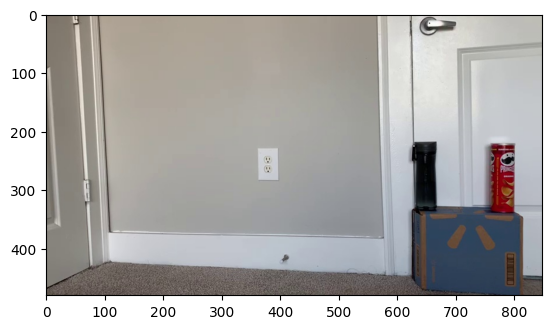

In [ ]:
plt.imshow(cv2.cvtColor(images[5], cv2.COLOR_BGR2RGB))
print(images[6].shape)

True

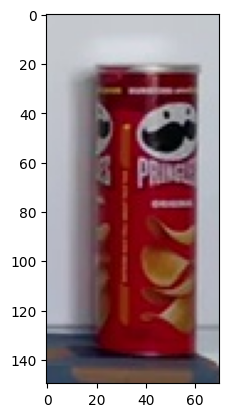

In [16]:
cropped_image = images[5][200:350,740:810]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

cv2.imwrite("Cropped Image.jpg", cropped_image)

In [ ]:
d=dict()
d_norm=dict()
for i in range(0,330,20):
    for j in range(0,778,20):
        #print(i,j)
        #print(i+130,j+160)
        d[str(i)+":"+str(i+150),str(j)+":"+str(j+70)]=ssd(cropped_image,images[6][i:i+150,j:j+70])
        #d_norm[str(i)+":"+str(i+100),str(j)+":"+str(j+100)]=ncc(norm_data(cropped_image),norm_data(images[0][i:i+100,j:j+100]))

In [18]:
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))

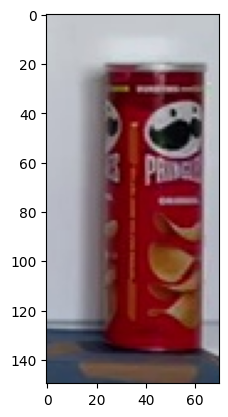

In [19]:
plt.imshow(cv2.cvtColor(images[6][y1:y2,x1:x2], cv2.COLOR_BGR2RGB))

In [ ]:
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(images[6], (x1,y1), (x2,y2), color, thickness)

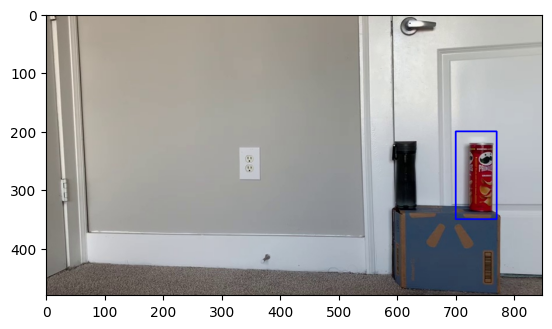

In [21]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Motion tracking equation

2


In [ ]:
Iref=cv2.imread(r'C:\Users\padar\Desktop\cv-3\frame0.jpg',cv2.IMREAD_GRAYSCALE)
Inext=cv2.imread(r'C:\Users\padar\Desktop\cv-3\frame30.jpg',cv2.IMREAD_GRAYSCALE)
Iref=np.array(Iref).astype(np.float32)
Inext=np.array(Inext).astype(np.float32)
kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25
kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
kernel_t = np.array([[1., 1.], [1., 1.]])*.25
Iref = Iref / 255. # normalize pixels
Inext = Inext / 255. # normalize pixels
Ix=cv2.filter2D(Iref,-1,kernel=kernel_x)
Iy=cv2.filter2D(Iref,-1,kernel=kernel_y)
It=cv2.filter2D(Iref,-1,kernel=kernel_t)+cv2.filter2D(Inext,-1,kernel=kernel_x)
Ix,Iy,It=np.array(Ix),np.array(Iy),np.array(It)

In [ ]:
u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))

C:\Users\padar\AppData\Local\Temp\ipykernel_15852\3143559099.py:1: RuntimeWarning: divide by zero encountered in divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))
C:\Users\padar\AppData\Local\Temp\ipykernel_15852\3143559099.py:1: RuntimeWarning: invalid value encountered in divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))


In [43]:
u

array([[        inf,         inf,         inf, ...,         inf,
                inf,         inf],
       [        inf,         inf,         inf, ...,         inf,
                inf,         inf],
       [        inf,         inf,         inf, ...,         inf,
                inf,         inf],
       ...,
       [235.00002  , 235.00002  , 235.00002  , ...,   2.6496704,
          2.7500007,   1.7294945],
       [        inf,         inf,         inf, ...,   2.9102936,
          3.8013163,   1.7500001],
       [        inf,         inf,         inf, ...,   3.2819946,
          3.9223225,   1.9000002]], dtype=float32)

2.2

In [27]:
import cv2
import numpy as np
 
def image_registraion(align,ref):

# Open the image files.
  img1_color = align  # Image to be aligned.
  img2_color = ref    # Reference image.
  
  # Convert to grayscale.
  img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
  img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
  height, width = img2.shape
  
  # Create ORB detector with 5000 features.
  orb_detector = cv2.ORB_create(5000)
  
  # Find keypoints and descriptors.
  # The first arg is the image, second arg is the mask
  #  (which is not required in this case).
  kp1, d1 = orb_detector.detectAndCompute(img1, None)
  kp2, d2 = orb_detector.detectAndCompute(img2, None)
  
  # Match features between the two images.
  # We create a Brute Force matcher with
  # Hamming distance as measurement mode.
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
  
  # Match the two sets of descriptors.
  matches = matcher.match(d1, d2)
  
  # Sort matches on the basis of their Hamming distance.
  matches=sorted(matches,key = lambda x: x.distance)
  
  # Take the top 90 % matches forward.
  matches = matches[:int(len(matches)*0.9)]
  no_of_matches = len(matches)
  
  # Define empty matrices of shape no_of_matches * 2.
  p1 = np.zeros((no_of_matches, 2))
  p2 = np.zeros((no_of_matches, 2))
  
  for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt
  
  # Find the homography matrix.
  homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
  
  # Use this matrix to transform the
  # colored image wrt the reference image.
  transformed_img = cv2.warpPerspective(img1_color,
                      homography, (width, height))
  return transformed_img

In [ ]:
# importing the necessary libraries
import cv2
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture(r'C:\Users\padar\Desktop\CV-2\m1.mp4')
ret, frame = cap.read()

# Loop until the end of the video
while (cap.isOpened()):
	# Capture frame-by-frame
	prev=frame
	ret, frame = cap.read()
	disp=image_registraion(frame,prev)

	
	disp = cv2.resize(disp, (540, 380), fx = 0, fy = 0,
						interpolation = cv2.INTER_CUBIC)

	# Display the resulting frame
	cv2.imshow('Frame', disp)

	# define q as the exit button
	if cv2.waitKey(25) & 0xFF == ord('q'):
		break

# release the video capture object
cap.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()

Q3.

In [ ]:
import cv2 as cv
import numpy as np


# The video feed is read in as
# a VideoCapture object
cap = cv.VideoCapture(r"C:\Users\padar\Desktop\CV-2\m1.mp4")
ret, first_frame = cap.read()
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[..., 1] = 255
count=0
while(cap.isOpened() and count<30):

    ret, frame = cap.read()
    count+=1
    
    # Opens a new window and displays the input
    # frame
    frame=cv.flip(frame,0)
    cv.imshow("input", frame)
    
#cv2.destroyAllWindows()
    
    # Converts each frame to grayscale - we previously
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)

    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
    # Sets image hue according to the optical flow
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
    
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
    
    # Updates previous frame
    prev_gray = gray
    
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()

Q5.

In [ ]:
import cv2
import os
import time

import imutils
detectorPaths = {
    
    "face": r"C:\Users\padar\Desktop\cv-3\face.xml",
    "smile": r"C:\Users\padar\Desktop\cv-3\smile.xml",
}

print("[INFO] loading haar cascades...")
detectors = dict()
 
for (name, path) in detectorPaths.items():
    detectors[name] = cv2.CascadeClassifier(path)

print("[INFO] starting video stream...")
vs = cv2.VideoCapture(0)

while True:
    _,frame = vs.read()
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faceRects = detectors["face"].detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE)

    for (fX, fY, fW, fH) in faceRects:
        faceROI = gray[fY:fY + fH, fX:fX + fW]
        smileRects = detectors["smile"].detectMultiScale(
            faceROI, scaleFactor=1.1, minNeighbors=10,
            minSize=(15, 15), flags=cv2.CASCADE_SCALE_IMAGE)
        for (sX, sY, sW, sH) in smileRects:
            ptA = (fX + sX, fY + sY)
            ptB = (fX + sX + sW, fY + sY + sH)
            cv2.rectangle(frame, ptA, ptB, (255, 0, 0), 2)
        cv2.rectangle(frame, (fX, fY), (fX + fW, fY + fH),
                      (0, 255, 0), 2)
    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) == ord("q"):
        break

cv2.destroyAllWindows()

[INFO] loading haar cascades...
[INFO] starting video stream...


In [ ]:
pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for imutils, since package 'wheel' is not installed.
  Running setup.py install for imutils: started
  Running setup.py install for imutils: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\padar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Q6)

In [ ]:
# importing the module
import cv2

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):

	# checking for left mouse clicks
	if event == cv2.EVENT_LBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font,
					1, (255, 0, 0), 2)
		cv2.imshow('image', img)

	# checking for right mouse clicks	
	if event==cv2.EVENT_RBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		b = img[y, x, 0]
		g = img[y, x, 1]
		r = img[y, x, 2]
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r),
					(x,y), font, 1,
					(255, 255, 0), 2)
		cv2.imshow('image', img)

# driver function
if __name__=="__main__":

	# reading the image
	img = cv2.imread(r'C:\Users\padar\Desktop\cv-3\image3.jpg', 1)

	# displaying the image
	cv2.imshow('image', img)

	# setting mouse handler for the image
	# and calling the click_event() function
	cv2.setMouseCallback('image', click_event)

	# wait for a key to be pressed to exit
	cv2.waitKey(0)

	# close the window
	cv2.destroyAllWindows()

956   332


In [ ]:
ul,vl= 597 ,  327
ur,vr=956 , 332
b=152.2 # distance between left and right cameras
f=1329.30324 #focallength
z=(b*f)/(ul-ur) #distance of object
print('The distance is '+str(z)+'mm')

The distance is -563.5653290473537mm


In [ ]:
import cv2 as cv
import math as math
import numpy as np
org=cv.imread(r'C:\Users\padar\Desktop\cv-3\sivani image.jpeg')
ref=cv.imread(r'C:\Users\padar\Desktop\cv-3\cropped.png')
org = cv.cvtColor(org, cv.COLOR_BGR2GRAY)
ref=cv.cvtColor(ref, cv.COLOR_BGR2GRAY)
print(ref.shape)
print(org.shape)


(415, 512)
(805, 1305)


In [ ]:
def sum_squ_dis(cropped,orginal):
    squares = (cropped[:,:] - orginal[:,:]) ** 2
    return math.sqrt(np.sum(squares))

In [ ]:
d=dict()
d_norm=dict()
for i in range(0,390,20):
    for j in range(0,793,20):
        d[str(i)+":"+str(i+415),str(j)+":"+str(j+512)]=sum_squ_dis(ref,org[i:i+415,j:j+512])
        #d_norm[str(i)+":"+str(i+100),str(j)+":"+str(j+100)]=ncc(norm_data(cropped_image),norm_data(images[0][i:i+100,j:j+100]))

In [ ]:
a=sorted(d.items(), key=lambda x: x[1])

In [ ]:
#print(d.items())
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))

In [ ]:
color = (0, 255, 0)
thickness = 2
print(x1,y1)
image = cv.rectangle(org, (x1,y1), (x2,y2), color, thickness)
image=cv.rectangle(org, (80,100), (620,500), color, thickness)
cv.putText(image, 'tree', (x1+30, y1+30), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
cv.putText(image, 'tree', (90, 110), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

660 220


array([[29, 29, 29, ..., 30, 30, 30],
       [29, 29, 29, ..., 30, 30, 30],
       [29, 29, 29, ..., 30, 30, 30],
       ...,
       [31, 31, 31, ..., 29, 29, 28],
       [31, 31, 31, ..., 29, 28, 28],
       [31, 31, 31, ..., 28, 28, 28]], dtype=uint8)

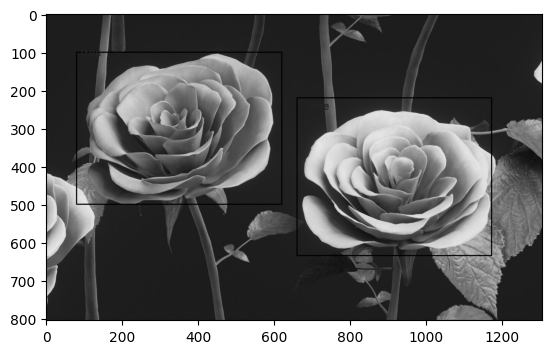

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))